# Jupyter Notebook

Установка библиотек

In [ ]:
!pip install {package-name}

Получить документацию: `shift`+`tab`

In [1]:
list()

[]

Замер времени работы ячейки

In [3]:
%timeit pass

8.13 ns ± 0.704 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [4]:
%%timeit

a = 10
b = 100

a + b

46.3 ns ± 7.24 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Замер потребляемой памяти в ячейке

In [2]:
!pip install --quiet memory-profiler

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
%load_ext memory_profiler

In [6]:
%memit pass

peak memory: 96.34 MiB, increment: 0.10 MiB


In [19]:
%%memit

a = [10000 for i in range(1000000)]
b = a.copy()

peak memory: 123.20 MiB, increment: 23.27 MiB


Для работы со скриптами есть декоратор:

In [2]:
from memory_profiler import profile


@profile
def some_function(x):
    return [x for x in range(100)]


some_function(10)
pass

ERROR: Could not find file <ipython-input-2-b38d20ed1d9c>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


Устанавливаем `nbextensions` для удобства

In [159]:
!pip install --quiet jupyter_contrib_nbextensions

In [62]:
!jupyter contrib nbextension install --user

# Numpy

In [6]:
# Установим numpy, если нужно
!pip install --quiet numpy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [7]:
import numpy as np

<b>NumPy</b> — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.

Мотивирующая картинка

![](https://i.ibb.co/d0sJYtC/z4GzOX6.png)

Основная единица - массив ([np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)) (вектор, матрица, тензор, etc)

In [8]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
type(np.array([1, 2, 3]))

numpy.ndarray

### Похож на обычный список (list), но есть различия

#### Различие номер раз:

In [10]:
[1, 2, 'a', print]

[1, 2, 'a', <function print>]

In [13]:
np.array([1, 2, 'a'])

array(['1', '2', 'a'], dtype='<U21')

Т.е. все элементы массива должны быть одного типа

In [14]:
np.array([1, 2, 1]) # теперь тип всех элементов -- это инт

array([1, 2, 1])

In [15]:
np.array([1, 2, 1]).dtype

dtype('int64')

#### Различие номер два:

In [16]:
a = [1, 2, 3]
a.append(4)
a

[1, 2, 3, 4]

In [17]:
a = np.array([1, 2, 3])
a.append(4)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Добавить элементов в массив можно, но:

In [18]:
a = np.append(a, 5)

In [19]:
a

array([1, 2, 3, 5])

In [20]:
a[3] = 1

In [21]:
a

array([1, 2, 3, 1])

In [ ]:
a[4] = 1

In [163]:
a = np.array([1, 2 ,3])
print(id(a))
b = a
b[2] = 10
print(id(b))
a

140730209452560
140730209452560


array([ 1,  2, 10])

Т.е. размер конкретного массива фиксируется в момент создания и "увеличить" его без создания нового объекта нельзя

#### Различие номер три

Надо быть аккуратнее с типами данных: типы в numpy немного отличаются от стандартных питоновских типов

In [22]:
a = [1, 2, 3]
a[0] += 1232234234234324353453453
a

[1232234234234324353453454, 2, 3]

In [23]:
b = np.array([1, 2, 3])
b[0] += 1232234234234324353453453

OverflowError: Python int too large to convert to C long

In [26]:
print(type(a[0]), type(b[0]))

<class 'int'> <class 'numpy.int64'>


### Как можно получить нампаевский массив:

#### Из стандартных структур питона

In [27]:
np.array([2, 3])

array([2, 3])

In [31]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

#### Также есть много стандартных генераторов

Матрица из единиц

In [32]:
np.ones(3)

array([1., 1., 1.])

In [36]:
np.ones([2, 2])

array([[1., 1.],
       [1., 1.]])

Нулевая матрица

In [37]:
np.zeros(2)

array([0., 0.])

Более гибкий аналог питоновского `range`

In [38]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
np.arange(0.5, 10.5, 1.1)

array([ 0.5,  1.6,  2.7,  3.8,  4.9,  6. ,  7.1,  8.2,  9.3, 10.4])

То же самое, но задаем не количество элементов, а шаг, с которым эти элементы создаем

In [40]:
np.linspace(10.1, 20.3, 10)

array([10.1       , 11.23333333, 12.36666667, 13.5       , 14.63333333,
       15.76666667, 16.9       , 18.03333333, 19.16666667, 20.3       ])

In [41]:
np.logspace(1, 2, 3, base=2)

array([2.        , 2.82842712, 4.        ])

In [42]:
np.logspace(-5, -10, 5)

array([1.00000000e-05, 5.62341325e-07, 3.16227766e-08, 1.77827941e-09,
       1.00000000e-10])

Единичная матрица

In [43]:
np.ones([5, 5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [44]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Диагональная

In [45]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Все существующие генераторы можно посмотреть в [документации](https://numpy.org/doc/stable/). 

$\textbf{Важно}$: для создания numpy массивов лучше пользоваться именно встроенными генераторами везде, где это возможно, поскольку они хорошо оптимизированы и работают намного быстрее списков.

In [46]:
%%timeit

n = 1000
np.zeros(n)

1.07 µs ± 87.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [47]:
%%timeit

n = 1000
np.array([0 for _ in range(n)])

117 µs ± 7.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Индексация

Все точно так же, как и в `list`

In [48]:
a = np.array([1, 2, 3, 4])

In [49]:
a[0], a[1], a[-1]

(1, 2, 4)

In [50]:
a[1:3]

array([2, 3])

In [51]:
a = np.random.randn(3, 3)

In [52]:
a

array([[-0.84254027,  0.14155905,  0.30582608],
       [-0.95538149,  1.25344457, -1.39107999],
       [ 1.26072437, -0.70198599, -0.71379884]])

Вместо `len` используем `shape`

In [56]:
len(a)

3

In [57]:
a.shape

(3, 3)

In [58]:
a.shape[0]

3

In [59]:
a[0]

array([-0.84254027,  0.14155905,  0.30582608])

In [60]:
a

array([[-0.84254027,  0.14155905,  0.30582608],
       [-0.95538149,  1.25344457, -1.39107999],
       [ 1.26072437, -0.70198599, -0.71379884]])

Можно легко брать определенную строку или столбец матрицы

In [62]:
a[0, :]

array([-0.84254027,  0.14155905,  0.30582608])

In [63]:
a[:, 0]

array([-0.84254027, -0.95538149,  1.26072437])

In [64]:
%%timeit

a[0, 0]

172 ns ± 18.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Или так

In [65]:
%%timeit

a[0][0]

447 ns ± 141 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [3]:
import numpy as np

Важно понимать, как работает индексация:

In [4]:
a = np.random.randn(3, 4, 5, 6)
a.shape

(3, 4, 5, 6)

In [5]:
a[0][0][0].shape

(6,)

In [6]:
a[0, 0].shape

(5, 6)

In [7]:
a[0][0].shape

(5, 6)

In [10]:
a[:, :, :, 0].shape

(3, 4, 5)

### Математические вычисления: легко и быстро

In [71]:
import math

Попробуем сложить все элементы в списке:

In [72]:
a = [i for i in range(10)]

b = [i ** 2 for i in range(10)]

In [73]:
a + b # ???

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [74]:
for i in range(len(a)):
    a[i] += b[i]

a

[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]

В numpy все проще:

In [75]:
a = np.arange(10)
b = np.arange(10) ** 2

In [76]:
a += b
a

array([ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90])

In [77]:
a = np.add(a, b)

In [78]:
a = np.subtract(a, b)
a

array([ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90])

In [79]:
np.sin(a)

array([ 0.        ,  0.90929743, -0.2794155 , -0.53657292,  0.91294525,
       -0.98803162, -0.91652155, -0.521551  ,  0.25382336,  0.89399666])

In [80]:
np.exp(a)

array([1.00000000e+00, 7.38905610e+00, 4.03428793e+02, 1.62754791e+05,
       4.85165195e+08, 1.06864746e+13, 1.73927494e+18, 2.09165950e+24,
       1.85867175e+31, 1.22040329e+39])

In [81]:
np.mean(a)

33.0

In [82]:
a.mean()

33.0

In [83]:
np.median(a)

25.0

Рассмотрим две операции: одинаковые ли они?

In [87]:
(a * b)

array([   0,    2,   24,  108,  320,  750, 1512, 2744, 4608, 7290])

In [88]:
a.dot(b)

17358

In [89]:
np.dot(a, b)

17358

#### Многие нампайные функции можно применять и к числам:

In [90]:
np.sin(1)

0.8414709848078965

Но лучше не надо

In [91]:
%timeit math.exp(1)

125 ns ± 26.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [92]:
%timeit np.exp(1)

993 ns ± 48.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Зато векторные операции работают намного быстрее

In [93]:
def sin_of_num(x):
    return math.sin(x)

a = np.arange(1000)

In [94]:
%timeit np.sin(a)

13 µs ± 986 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [95]:
%%timeit

for i in range(a.shape[0]):
    a[i] = sin_of_num(a[i])

527 µs ± 115 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### А еще многие операции можно ускорить, сделав их векторными

In [96]:
sin_of_vector = np.vectorize(sin_of_num)
a = np.arange(1000)

In [97]:
%%timeit

sin_of_vector(a)

275 µs ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Общее правило - всегда пытайтесь избегать циклы там, где это можно сделать. Если нужно изменить все значения в массиве - используйте встроенную в numpy функцию, либо векторизуйте свою функцию. np.vectorize можно использовать и как декоратор:

In [98]:
@np.vectorize
def sin_of_num(x):
    return math.sin(x)

sin_of_num(a)

array([ 0.00000000e+00,  8.41470985e-01,  9.09297427e-01,  1.41120008e-01,
       -7.56802495e-01, -9.58924275e-01, -2.79415498e-01,  6.56986599e-01,
        9.89358247e-01,  4.12118485e-01, -5.44021111e-01, -9.99990207e-01,
       -5.36572918e-01,  4.20167037e-01,  9.90607356e-01,  6.50287840e-01,
       -2.87903317e-01, -9.61397492e-01, -7.50987247e-01,  1.49877210e-01,
        9.12945251e-01,  8.36655639e-01, -8.85130929e-03, -8.46220404e-01,
       -9.05578362e-01, -1.32351750e-01,  7.62558450e-01,  9.56375928e-01,
        2.70905788e-01, -6.63633884e-01, -9.88031624e-01, -4.04037645e-01,
        5.51426681e-01,  9.99911860e-01,  5.29082686e-01, -4.28182669e-01,
       -9.91778853e-01, -6.43538133e-01,  2.96368579e-01,  9.63795386e-01,
        7.45113160e-01, -1.58622669e-01, -9.16521548e-01, -8.31774743e-01,
        1.77019251e-02,  8.50903525e-01,  9.01788348e-01,  1.23573123e-01,
       -7.68254661e-01, -9.53752653e-01, -2.62374854e-01,  6.70229176e-01,
        9.86627592e-01,  

### Попробуем ускориться еще сильнее?

Если хочется ускорить свои функции еще сильнее, то можно использовать библиотеку [numba](https://habr.com/ru/post/484136/) и повысить производительность numpy до уровня C.

In [63]:
!pip install --quiet numba

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [25]:
import numba as nb

Основной объект, который нас интересует - это декоратор `nb.njit`. Можно просто обернуть функцию в этот декоратор и радоваться повышенной производительности:

In [101]:
@nb.njit()
def numba_mean(x):
    return np.std(x)

def numpy_mean(x):
    return np.std(x)

a = np.random.randint(0, 1000, 1000)

In [102]:
%timeit numpy_mean(a)

36 µs ± 7.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [103]:
%timeit numba_mean(a)

The slowest run took 8.45 times longer than the fastest. This could mean that an intermediate result is being cached.
6.23 µs ± 7.62 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Но на `numba` нужно писать очень аккуратно: очень много функций не поддерживается, многие встроенные возможности питона не поддерживаются и порой код писать очень трудно, поэтому читаем [документацию](http://numba.pydata.org/numba-doc/latest/reference/pysupported.html)

In [104]:
@nb.njit()
def this_doesnt_work(x):
    return {i: j for i, j in enumerate(range(5, 10))}

this_doesnt_work(np.array([1, 2]))

UnsupportedError: Failed in nopython mode pipeline (step: inline calls to locally defined closures)
[1mUse of unsupported opcode (MAP_ADD) found
[1m
File "<ipython-input-104-86feaf911884>", line 3:[0m
[1mdef this_doesnt_work(x):
[1m    return {i: j for i, j in enumerate(range(5, 10))}
[0m    [1m^[0m[0m
[0m

Внутри функций с декоратором нельзя использовать функции без декоратора:

In [105]:
def not_numba_func(x):
    return np.mean(x)

@nb.njit()
def numba_func(x):
    res = not_numba_func(x)
    return res

numba_func(np.arange(5))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'not_numba_func':[0m [1m[1mcannot determine Numba type of <class 'function'>[0m
[1m
File "<ipython-input-105-0892e315fad6>", line 6:[0m
[1mdef numba_func(x):
[1m    res = not_numba_func(x)
[0m    [1m^[0m[0m
[0m

А наоборот - можно

In [106]:
@nb.njit()
def numba_func(x):
    return np.mean(x)

def not_numba_func(x):
    return numba_mean(x)

not_numba_func(np.arange(5))

1.4142135623730951

### В случае многомерных данных:

In [107]:
a = np.random.randint(0, 10, size=(5, 3))

In [108]:
a

array([[1, 0, 8],
       [5, 2, 1],
       [4, 7, 2],
       [9, 2, 0],
       [1, 8, 5]])

In [109]:
a.sum(), np.sum(a)

(55, 55)

In [110]:
a.sum(axis=0), np.sum(a, axis=0), a.mean(axis=0)

(array([20, 19, 16]), array([20, 19, 16]), array([4. , 3.8, 3.2]))

In [111]:
a.sum(axis=1), np.sum(a, axis=1)

(array([ 9,  8, 13, 11, 14]), array([ 9,  8, 13, 11, 14]))

In [112]:
a = np.random.randint(0, 10, size=(2, 3, 2, 3))

In [113]:
a.sum(axis=(0, 1))

array([[30, 32, 28],
       [20, 29, 23]])

Отрицательные числа тоже можно использовать

In [114]:
a.sum(axis=(-1, -2, 0))

array([56, 61, 45])

### Можно менять форму массивов

In [115]:
a = np.random.randint(0, 10, (4, 3))
a

array([[0, 8, 4],
       [9, 7, 9],
       [1, 2, 4],
       [5, 2, 4]])

In [116]:
a.shape

(4, 3)

In [117]:
a.reshape((3, 4))

array([[0, 8, 4, 9],
       [7, 9, 1, 2],
       [4, 5, 2, 4]])

In [123]:
a.reshape(12)

array([0, 8, 4, 9, 7, 9, 1, 2, 4, 5, 2, 4])

In [120]:
a.flatten()

array([0, 8, 4, 9, 7, 9, 1, 2, 4, 5, 2, 4])

### Еще можно удобно менять размерность

In [124]:
a = np.arange(5)
a.shape

(5,)

In [125]:
a = np.expand_dims(a, axis=0)
a.shape

(1, 5)

In [126]:
a = np.expand_dims(a, axis=2)
a.shape

(1, 5, 1)

In [127]:
a = np.squeeze(a)
a.shape

(5,)

### Перемножать и обращать матрицы тоже можно

In [128]:
a = np.random.randn(3, 4)
b = np.random.randn(4, 5)

In [129]:
a.dot(b)

array([[ 0.55923057,  1.68040601,  1.46437127, -1.78846256,  1.10483035],
       [ 0.61186924, -1.15135594,  0.17570239, -1.08605582, -1.11701208],
       [-1.19943274,  0.02530379,  1.2200113 ,  0.69070436, -2.35415504]])

In [130]:
a.dot(b).shape

(3, 5)

In [ ]:
(a @ b).shape

In [20]:
a = np.random.randn(4, 4)

### При помощи модуля linalg можно делать крутые операции над матрицами

In [21]:
np.linalg.inv(a)

array([[-0.64025804, -0.77151519,  0.05170725, -0.67528748],
       [ 0.4683908 ,  0.29496768,  0.14300946, -0.15933017],
       [ 0.64860623,  0.76591242,  0.5967959 ,  0.81552203],
       [-0.80552146,  0.39129172, -0.19395261, -0.44185425]])

In [22]:
np.linalg.inv(a).dot(a)

array([[ 1.00000000e+00, -9.96377823e-17,  1.22156789e-16,
         7.91828258e-17],
       [-5.93026799e-17,  1.00000000e+00, -1.32879727e-16,
        -1.07599333e-16],
       [-1.28371613e-16,  1.82976237e-16,  1.00000000e+00,
        -1.51006405e-16],
       [-4.72781133e-17, -6.56943542e-17, -4.18615339e-18,
         1.00000000e+00]])

In [23]:
np.allclose(np.linalg.inv(a).dot(a), np.eye(len(a)))

True

In [24]:
np.linalg.inv(a).dot(a) == np.eye(len(a))

array([[False, False, False, False],
       [False,  True, False, False],
       [False, False, False, False],
       [False, False, False,  True]])

Стоит быть аккуратным, если приходится производить много "тяжелых" матричных операций. Таких как перемножение или обращение. Всё дело в том, что нампай под капотом - это C и Fortran. И эти две либы могут начать параллелиться на все ядра. Из-за этого проц может забиться. Выход - запуск скриптов с переменной окружения `OMP_NUM_THREADS=1`

### Можно даже находить разложения матриц

In [138]:
a = np.random.randint(0, 10, size=(4, 4))

q, r = np.linalg.qr(a)

In [139]:
q

array([[-0.41208169,  0.43934103, -0.70373433, -0.37673086],
       [-0.82416338, -0.49102821,  0.24807901, -0.13454674],
       [-0.27472113,  0.06460897, -0.2885817 ,  0.9149178 ],
       [-0.27472113,  0.7494641 ,  0.59994617,  0.05381869]])

In [140]:
r

array([[ -7.28010989, -13.18661414,  -6.18122538,  -8.79107609],
       [  0.        ,   5.84065129,   4.53555001,  -0.67193333],
       [  0.        ,   0.        ,  -3.49588886,   3.23008993],
       [  0.        ,   0.        ,   0.        ,   2.7985721 ]])

### Или решать системы уравнений

In [141]:
A = np.eye(3) * 2
b = np.random.randint(0, 10, size=(3, 1))

x = np.linalg.solve(A, b)
x

array([[4.5],
       [3. ],
       [2. ]])

In [142]:
np.allclose(x, b/2)

True

### Считать определитель или число обусловленности

In [143]:
np.linalg.det(A)

7.999999999999998

In [144]:
np.linalg.cond(A)

1.0

### И транспонировать тоже можно

In [145]:
a = np.random.randint(0, 10, size=(3, 4))
a

array([[6, 5, 0, 8],
       [5, 5, 3, 5],
       [6, 0, 1, 9]])

In [146]:
np.transpose(a)

array([[6, 5, 6],
       [5, 5, 0],
       [0, 3, 1],
       [8, 5, 9]])

Или можно вот так

In [147]:
a.T

array([[6, 5, 6],
       [5, 5, 0],
       [0, 3, 1],
       [8, 5, 9]])

### А что, если матрицы разной формы:
[broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [148]:
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])

In [149]:
a * b

array([2, 4, 6])

In [150]:
a * 2

array([2, 4, 6])

In [151]:
a + 2

array([3, 4, 5])

In [152]:
a * np.array([1])

array([1, 2, 3])

In [153]:
a * np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Со скалярами разобрались. они будут прибавляться(умножаться, вычитаться, делиться) к каждому элементу матрицы.

Если матрицы одинаковые, то все операции тоже будут применяться поэлементно

In [154]:
a = np.random.randint(0, 10, (3, 4))
a

array([[5, 5, 1, 9],
       [9, 9, 7, 2],
       [1, 1, 5, 0]])

In [155]:
b = np.ones(4) * 100
b

array([100., 100., 100., 100.])

In [156]:
a + b

array([[105., 105., 101., 109.],
       [109., 109., 107., 102.],
       [101., 101., 105., 100.]])

К каждой строчке матрицы прибавился вектор *b*

Как быть, если хотим прибавить к каждому столбцу вектор *c*?

In [11]:
c = np.array([1, 2, 3])

In [12]:
a.shape

(3, 4, 5, 6)

In [13]:
c.shape

(3,)

In [14]:
a + c

ValueError: operands could not be broadcast together with shapes (3,4,5,6) (3,) 

In [18]:
c[np.newaxis, ].shape

(1, 3)

Можно вот так, как говорили раньше

In [163]:
np.expand_dims(c, axis=0).shape

(1, 3)

In [164]:
c[:, np.newaxis].shape

(3, 1)

In [165]:
c[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [166]:
np.newaxis is None

True

In [167]:
a + c[:, np.newaxis]

array([[ 6,  6,  2, 10],
       [11, 11,  9,  4],
       [ 4,  4,  8,  3]])

### Про конкатенацию

In [168]:
a = np.random.randint(0, 10, (5, 3))
b = np.random.randint(0, 10, (11, 3))

np.concatenate((a, b), axis=0).shape

(16, 3)

In [169]:
a = np.random.randint(0, 10, (5, 3))
b = np.random.randint(0, 10, (5, 11))

np.concatenate((a, b), axis=1).shape

(5, 14)

# [Pandas](https://pythonspot.com/category/pandas/)

**pandas** — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами. Название библиотеки происходит от эконометрического термина «панельные данные», используемого для описания многомерных структурированных наборов информации. pandas распространяется под новой лицензией BSD.

In [1]:
!pip install --quiet pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

In [3]:
# Download the dataset from UCI Machine Learning Repository
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(csv_url, header = None)

In [6]:
col_names = ['sepal.length','sepal.width','petal.length','petal.width','variety']
df = pd.read_csv(csv_url, names=col_names)

In [7]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Основной объект в pandas - это DataFrame, состоящий из набора столбцов - Series.

In [6]:
# df = pd.read_csv("iris.csv")

In [7]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
type(df['variety'])

pandas.core.series.Series

In [77]:
df['variety'].dtype

dtype('O')

### Индексация:

In [11]:
df[0]

KeyError: 0

In [78]:
df.iloc[0]

sepal.length            5.1
sepal.width             3.5
petal.length            1.4
petal.width             0.2
variety         Iris-setosa
is_setosa              True
Name: 0, dtype: object

In [12]:
df['sepal.length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [13]:
df[['sepal.length', 'sepal.width']]

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [14]:
df.iloc[0]['sepal.length']

5.1

Можно еще вот так

In [15]:
df.loc[0, 'sepal.length']

5.1

In [80]:
df[10:20]

,sepal.length,sepal.width,petal.length,petal.width,variety,is_setosa
10,5.4,3.7,1.5,0.2,Iris-setosa,True
11,4.8,3.4,1.6,0.2,Iris-setosa,True
12,4.8,3.0,1.4,0.1,Iris-setosa,True
13,4.3,3.0,1.1,0.1,Iris-setosa,True
14,5.8,4.0,1.2,0.2,Iris-setosa,True
15,5.7,4.4,1.5,0.4,Iris-setosa,True
16,5.4,3.9,1.3,0.4,Iris-setosa,True
17,5.1,3.5,1.4,0.3,Iris-setosa,True
18,5.7,3.8,1.7,0.3,Iris-setosa,True
19,5.1,3.8,1.5,0.3,Iris-setosa,True


Вывести первые n строк можно при помощи метода head:

In [17]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Так же можем применять все векторные функции:

In [18]:
np.sin(df['sepal.length'])

0     -0.925815
1     -0.982453
2     -0.999923
3     -0.993691
4     -0.958924
         ...   
145    0.404850
146    0.016814
147    0.215120
148   -0.083089
149   -0.373877
Name: sepal.length, Length: 150, dtype: float64

Иногда бывает полезно использовать метод `to_numpy`, который превращает DataFrame в ndarray:

In [19]:
%timeit np.sin(df['sepal.length'])

16.5 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [20]:
%timeit np.sin(df['sepal.length'].to_numpy())

2.39 µs ± 26.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [21]:
np.sin(df['sepal.length'].to_numpy())[:10]

array([-0.92581468, -0.98245261, -0.99992326, -0.993691  , -0.95892427,
       -0.77276449, -0.993691  , -0.95892427, -0.95160207, -0.98245261])

In [22]:
%timeit pd.Series(np.sin(df['sepal.length'].to_numpy()))

11 µs ± 57.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Основной метод для преобразования столбцов - это apply

In [23]:
df['sepal.length'].apply(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: sepal.length, Length: 150, dtype: float64

Применять его нужно осторожно: работает он очень медленно, поэтому всегда по возможности лучше использовать векторные функции (также не забываем про скорость работы numpy функций при использовании его не на векторах):

In [24]:
%%timeit

df['sepal.length'].apply(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)

173 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [25]:
%%timeit

vectorized_func = np.vectorize(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)
vectorized_func(df['sepal.length'])

167 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [26]:
%%timeit

vectorized_func = np.vectorize(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)
vectorized_func(df['sepal.length'].to_numpy())

157 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [31]:
import numba as nb

In [32]:
vectorized_func = nb.vectorize(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)

In [33]:
%%timeit

vectorized_func(df['sepal.length'].to_numpy())

The slowest run took 19.73 times longer than the fastest. This could mean that an intermediate result is being cached.
13.7 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Можно использовать и классические для sql возможности

In [34]:
df.groupby('variety').agg(['mean', 'median'])

sepal.length        sepal.width        petal.length         \
                        mean median        mean median         mean median   
variety                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal.width         
                       mean median  
variety                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

In [35]:
df.sort_values(['sepal.length', 'sepal.width'], ascending=True)

,sepal.length,sepal.width,petal.length,petal.width,variety
13,4.3,3.0,1.1,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica


После подобных преобразований в таблице меняется индекс: он перестает быть отсортированным. Можно делать так:

In [36]:
df.sort_values(['sepal.length', 'sepal.width']).reset_index(drop=True)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,4.3,3.0,1.1,0.1,Iris-setosa
1,4.4,2.9,1.4,0.2,Iris-setosa
2,4.4,3.0,1.3,0.2,Iris-setosa
3,4.4,3.2,1.3,0.2,Iris-setosa
4,4.5,2.3,1.3,0.3,Iris-setosa
...,...,...,...,...,...
145,7.7,2.6,6.9,2.3,Iris-virginica
146,7.7,2.8,6.7,2.0,Iris-virginica
147,7.7,3.0,6.1,2.3,Iris-virginica
148,7.7,3.8,6.7,2.2,Iris-virginica


In [37]:
df.drop_duplicates(['variety'], keep='first')

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


### Можно создавать новые столбцы

In [40]:
df['is_setosa'] = df['variety'].apply(lambda x: True if x == 'Setosa' else False)
df

,sepal.length,sepal.width,petal.length,petal.width,variety,is_setosa
0,5.1,3.5,1.4,0.2,Iris-setosa,False
1,4.9,3.0,1.4,0.2,Iris-setosa,False
2,4.7,3.2,1.3,0.2,Iris-setosa,False
3,4.6,3.1,1.5,0.2,Iris-setosa,False
4,5.0,3.6,1.4,0.2,Iris-setosa,False
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,False
146,6.3,2.5,5.0,1.9,Iris-virginica,False
147,6.5,3.0,5.2,2.0,Iris-virginica,False
148,6.2,3.4,5.4,2.3,Iris-virginica,False


### Или преобразовывать имеющиеся

In [41]:
df['is_setosa'] = [False if x else True for x in df['is_setosa']]
df

,sepal.length,sepal.width,petal.length,petal.width,variety,is_setosa
0,5.1,3.5,1.4,0.2,Iris-setosa,True
1,4.9,3.0,1.4,0.2,Iris-setosa,True
2,4.7,3.2,1.3,0.2,Iris-setosa,True
3,4.6,3.1,1.5,0.2,Iris-setosa,True
4,5.0,3.6,1.4,0.2,Iris-setosa,True
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,True
146,6.3,2.5,5.0,1.9,Iris-virginica,True
147,6.5,3.0,5.2,2.0,Iris-virginica,True
148,6.2,3.4,5.4,2.3,Iris-virginica,True


Списки и векторы numpy автоматически преобразуются к типу pd.Series в таких случаях

### Правильно итерируемся по таблице (но лучше так вообще не делаем)

In [42]:
%%timeit

for i in range(len(df)):
    df.iloc[i]

1.93 ms ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [43]:
%%timeit

for row in df.iterrows():
    row

1.69 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [44]:
for row in df.iterrows():
    break
row

(0,
 sepal.length            5.1
 sepal.width             3.5
 petal.length            1.4
 petal.width             0.2
 variety         Iris-setosa
 is_setosa              True
 Name: 0, dtype: object)

In [45]:
row[1]['is_setosa']

True

In [46]:
%%timeit

for tup in df.itertuples():
    tup

211 µs ± 2.53 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [64]:
for tup in df.itertuples():
    break
tup

Pandas(Index=0, _1=5.1, _2=3.5, _3=1.4, _4=0.2, variety='Iris-setosa', is_setosa=True)

### Ускоряем Pandas!

#### Pandarallel: способ распараллелить apply

In [48]:
!pip install --quiet pandarallel


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [54]:
from pandarallel import pandarallel

pandarallel.initialize(nb_workers=2, progress_bar=True)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [55]:
df['sepal.length'].parallel_apply(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)
pass

In [56]:
func = lambda x: np.sin(x) ** 2 + np.cos(x) ** 2

df.groupby('variety').parallel_apply(
    lambda x: func(x['sepal.length'])
)

variety            
Iris-setosa     0      1.0
                1      1.0
                2      1.0
                3      1.0
                4      1.0
                      ... 
Iris-virginica  145    1.0
                146    1.0
                147    1.0
                148    1.0
                149    1.0
Name: sepal.length, Length: 150, dtype: float64

#### Polars: тот же pandas, но написанный на Rust

In [57]:
!pip install -q polars


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [58]:
!pip install -q pyarrow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Синтаксис практически такой же, как у pandas, но работает намного быстрее. Можно быстро переводить в `pd.DataFrame` и обратно

In [59]:
import polars as pl

In [ ]:
data = pl.read_csv('iris.csv')
data = data.to_pandas()
data = pl.DataFrame(data)
data.head()

In [ ]:
print(data.head())

Особенно заметна разница в скорости чтения

In [ ]:
%%timeit

pd.read_csv('iris.csv')

In [ ]:
%%timeit

pl.read_csv('iris.csv')

Есть и знакомые функции

In [ ]:
data['sepal.length'].apply(func)
pass

Что-то работает немного иначе 

In [ ]:
for group in data.groupby(['variety']):
    print(group.head())

А что-то - не работает совсем

In [ ]:
data.variety

In [ ]:
data.iterrows()

In [ ]:
data.rows()[:10]

#### CSV - не самый удачный формат данных

In [ ]:
!pip install -q tables

Помимо csv, есть очень много других форматов, таких как `h5` и `parquet`. Эти форматы не так удобно смотреть глазами, зато они намного лучше жмутся, быстрее читаются и сохраняются (в некоторых случаях, разница может быть в сотни и тысячи раз!)

In [ ]:
big_df = pd.concat([df for _ in range(300)])

big_df.to_csv('iris.tmp.csv', index=False)
big_df.to_parquet('iris.parquet', index=False)
big_df.to_hdf('iris.h5', key='iris', index=True)

In [ ]:
%%timeit

pd.read_csv('iris.tmp.csv')

In [ ]:
%%timeit

pd.read_parquet('iris.parquet')

In [ ]:
%%timeit

pd.read_hdf('iris.h5', key='iris')

In [ ]:
import os 


print(f'csv:     {os.path.getsize("iris.tmp.csv")}')
print(f'parquet: {os.path.getsize("iris.parquet")}')
print(f'h5:      {os.path.getsize("iris.h5")}')

# [Matplotlib](https://matplotlib.org)

In [ ]:
!pip install --quiet matplotlib

In [225]:
import matplotlib.pyplot as plt

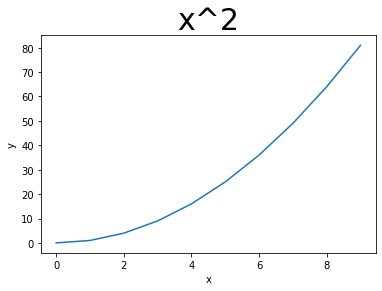

In [228]:
x = np.arange(0, 10)
y = x ** 2

plt.title('x^2', fontsize=30)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

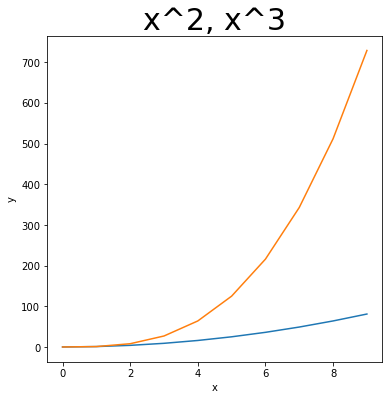

In [232]:
plt.figure(figsize=(6, 6))
x = np.arange(0, 10)
y = x ** 2
z = x ** 3
plt.title('x^2, x^3', fontsize=30)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='x^2')
plt.plot(x, z, label='x^3')
plt.legend()
plt.show()

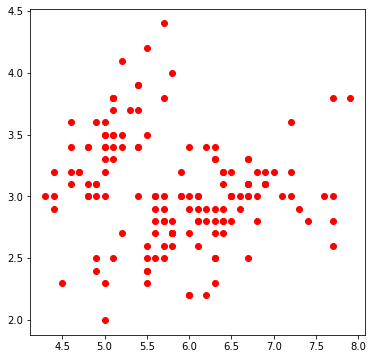

In [234]:
plt.figure(figsize=(6, 6))
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['sepal.width'], color='red')
plt.show()

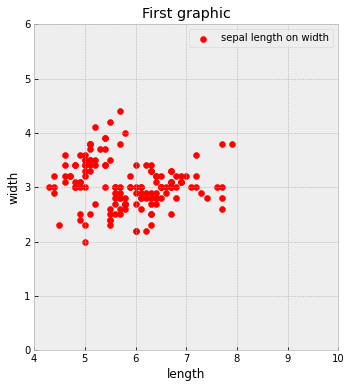

In [238]:
plt.style.use('bmh')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('First graphic')
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['sepal.width'], color='red', label='sepal length on width')
plt.xlim(4, 10)
plt.ylim(0, 6)
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Second graphic')
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['petal.width'], color='blue', label='sepal length on petal width')
plt.xlim(4, 8)
plt.ylim(0, 4)
plt.legend()

plt.show()

# Seaborn

Те же графики, только немного красивее, больше возможностей и больше автоматизации

In [65]:
!pip install --quiet seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [240]:
import seaborn as sns

Используем вместе с matplotlib

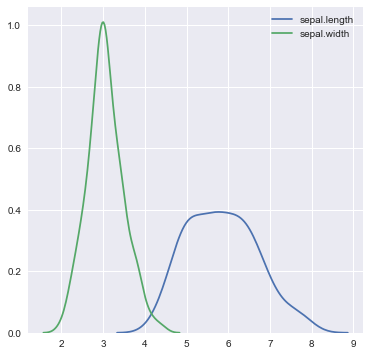

In [241]:
plt.style.use('seaborn')

plt.figure(figsize=(6, 6))
sns.kdeplot(df['sepal.length'])
sns.kdeplot(df['sepal.width'])
plt.show()

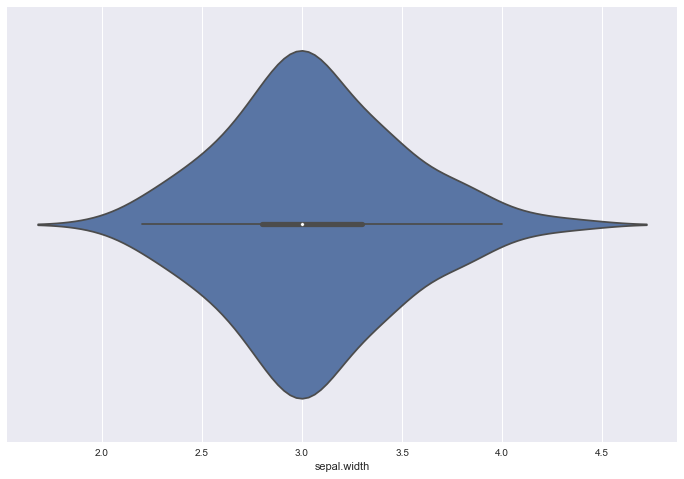

In [242]:
plt.figure(figsize=(12, 8))
sns.violinplot(df['sepal.width'])
plt.show()

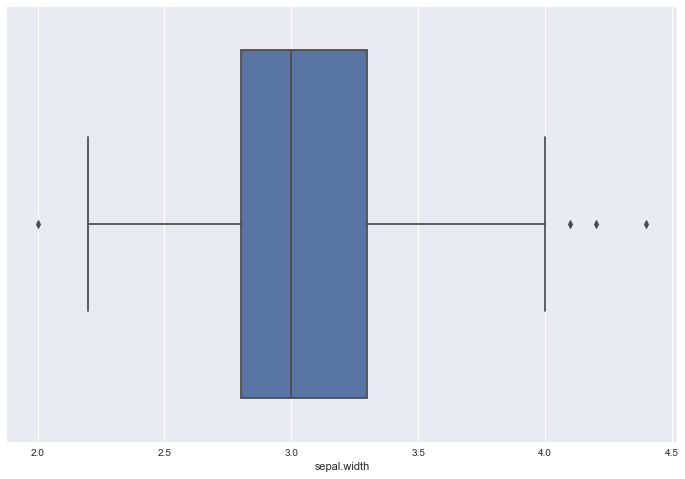

In [243]:
plt.figure(figsize=(12, 8))
sns.boxplot(df['sepal.width'])
plt.show()

In [244]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width,is_setosa
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.717416
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.603348
petal.length,0.871754,-0.428440,1.000000,0.962865,0.922765
petal.width,0.817941,-0.366126,0.962865,1.000000,0.887344
is_setosa,0.717416,-0.603348,0.922765,0.887344,1.000000


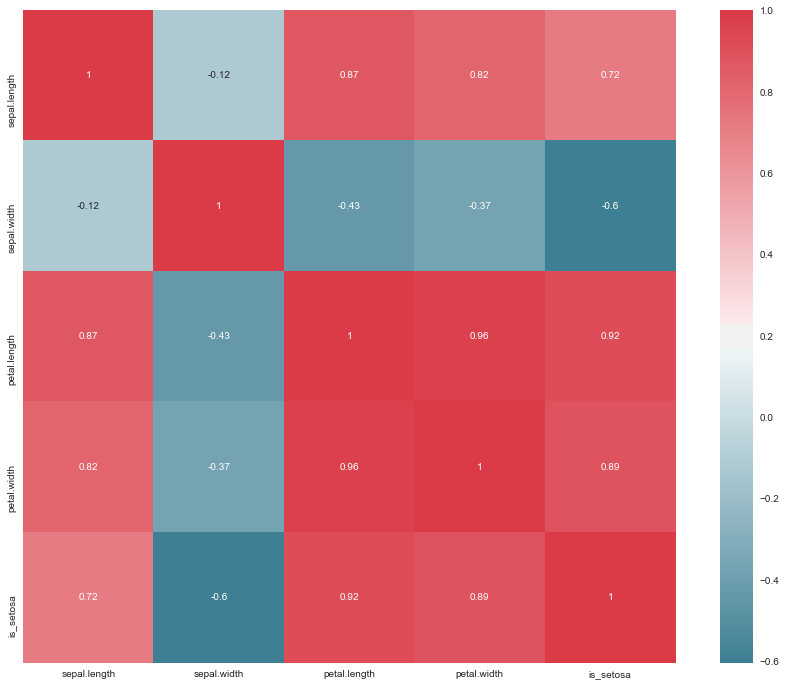

In [245]:
corr = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr, 
    mask=np.zeros_like(corr, dtype=np.bool), 
    cmap=sns.diverging_palette(220, 10, as_cmap=True), 
    square=True,
    annot=True
)
plt.show()

Можно и так:

In [250]:
corr.style.background_gradient(cmap='coolwarm', axis=None)

,sepal.length,sepal.width,petal.length,petal.width,is_setosa
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.717416
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.603348
petal.length,0.871754,-0.428440,1.000000,0.962865,0.922765
petal.width,0.817941,-0.366126,0.962865,1.000000,0.887344
is_setosa,0.717416,-0.603348,0.922765,0.887344,1.000000
